<a href="https://colab.research.google.com/github/komorimasashi/HIS2024-GenAI/blob/main/Interaction_Analysis_with_ChatGPT_version_yaml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ChatGPTで発話の機能を分類する


**※注意　ご自身のOpenAI（ChatGPT）のAPIキーを事前に取得しておく必要があります．**  

### このノートブックの使い方

#### 1. 自分のGoogleDriveにこのソースを保存する
まず「ドライブにコピー」アイコンをクリックして，自分自身のGoogle Driveにこのソースを保存してください．
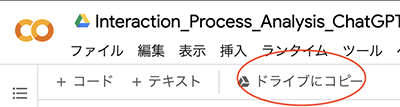



#### 2. 左のバーのフォルダのアイコンをクリックする
フォルダの形のアイコンをクリックすると，ファイルをこのアプリが使える場所に置くための場所を見ることができます．


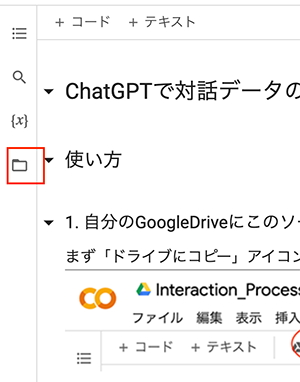

#### 3.　分析したいファイルをアップロード

*   「corpus」という名前をつけたフォルダを新規作成します．
*   このフォルダにご自身が分析したい会話を記録したテキストファイルをアップロードします．ただし，このファイルのフォーマットは，下に説明している「名大会話コーパス」の形式に従ってください．


デモ用の臨床事例`"ケース内発話書き起こし.txt"`を用意したので，下をクリックしてダウンロードして使ってください．この対話事例は，科学研究費補助金基盤研究(C)（課題番号: 20530569, 研究課題名： 心理臨床場面における対話の構造， 代表：桑原知子）で収集した模擬面接事例を改変して作成したものです．アプリの動作確認以外の目的での使用はお控えください．  
https://drive.google.com/uc?export=download&id=14fwJ9b_yZDIiM1RAc3PZ6BvZKvD6HBHj


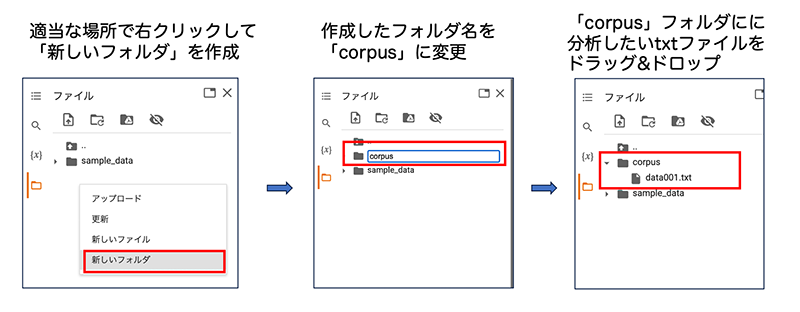

#### 4.　分析を実行
*   あとは，上のメニューの「ランタイム」から「すべてのセルを実行」を選べば実行できます．**ChatGPTは回答を返すまでにかなりディレイがあるのでしばらく待ってみてください．**
*   最終的には「output」というフォルダが作成されて，その中に結果を記述したファイルができています．このファイルを右クリックするとダウンロードできます．
*   作成されるのはcsvファイルですが，文字コードが「UTF-8」なのでExcelなどで開くと文字化けします．Excelで分析したい場合は，出力されたファイルの文字コード変換を行うか，プログラム中の  
`output.to_csv(f"output/{filename}.csv", encoding="utf-8")`  
を  
`output.to_csv(f"output/{filename}.csv", encoding="cp932")`  
に書き換えてください

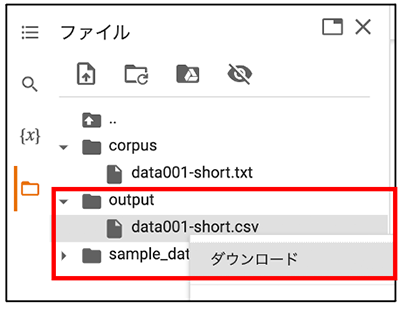

### 分析対象データ

#### 概要

このプログラムは，名大会話コーパスという日本語母語話者同士の雑談を文字化したコーパスのフォーマットのデータに対して，OpenAIの大規模言語モデルであるGPT3.5により相互作用過程分析を行うプログラムです．

**名大会話コーパス（国立国語研究所）**　　https://mmsrv.ninjal.ac.jp/nucc/
*   藤村逸子・大曽美恵子・大島ディヴィッド義和 (2011). 会話コーパスの構築によるコミュニケーション研究, 藤村逸子、滝沢直宏編『言語研究の技法：データの収集と分析』, p. 43-72、ひつじ書房.

**OpenAI ChatGPT** https://openai.com/chatgpt

#### 解析対象ファイルを使う方法


/corpus/というフォルダを作成し，その中に名大会話コーパス形式の.txtファイルを入れておく．  
分析が終了すると/output/というフォルダが作成され，そこに各ファイルごとに分析結果ファイルが生成される．

### 分類ルールの記述


#### 概要


Bales (1950)の相互作用過程分析に基づいて，対話中の個々の発話を分類するルールをjsonファイルに記述している．Balesは，集団の中での人々の行動が異なる原因の多くは，集団成員の役割構造（課題遂行的―感情表出的）のためであると考え，この分類体系（IPA: Interaction Process Analysis）では，課題行動と社会情緒行動の差を強調した．分類体系の日本語訳は白樫(1997)に従っている．

*   Bales, R. F. (1950). A set of categories for the analysis of small group interaction. American Sociological Review, 15(2), 257-263.
*   白樫三四郎　(1997). 社会心理学への招待. ミネルヴァ書房.

#### 分類規則



**【第1段階】「肯定的」，「中立的」，「否定的」で大分類を確定する**
*   **肯定的**な場合→A
*   **中立的**の場合
  *   それが「解答の試み」である場合→B
  *   それが「質問」である場合→C
*   **否定的**→D


**【第２段階】大分類ごとに細分番号を決定する**
*   A分類の場合
  *   「連帯性を示す，他人の立場を高める，援助，報いを与える」→1
  *   「緊張の緩和を示す，冗談を言う，笑う，満足を示す」　→2
  *   「同意する，受け身な受容を示す，理解する，協力する，従う」→3
*   B分類の場合
  *   「示唆・方向を与える，他人の自律を暗に意味する」→4
  *   「意見・評価・分析を与える，感情・願望を表明する」→5
  *   「オリエンテーション，情報を与える，繰り返す，明確化する，確証する」→6
*   C分類の場合
  *   「オリエンテーション，情報・反復・および確証を求める」→7
  *   「意見・評価・分析・感情の表明を求める」→8
  *   「示唆・方向・行為の可能な方法を求める」→9
*   D分類の場合
  *   不同意する，受け身な拒絶，形式性を示す，援助を引っ込める→10
  *   緊張を示す，援助を求める，場から引っ込む→11
  *   敵対心を示す，他人の立場をすぼませる，自己を防衛もしくは主張する→12


In [1]:
# 分類ルールはyaml形式で階層的に記述する
classification_rules = """
  - selection: "肯定的"
    classification:
      - selection: "連帯性を示す，他人の立場を高める，援助，報いを与える"
        value: 1
      - selection: "緊張の緩和を示す，冗談を言う，笑う，満足を示す"
        value: 2
      - selection: "同意する，受け身な受容を示す，理解する，協力する，従う"
        value: 3
  - selection: "中立的"
    classification:
      - selection: "解答の試み"
        classification:
          - selection: "示唆・方向を与える，他人の自律を暗に意味する"
            value: 4
          - selection: "意見・評価・分析を与える，感情・願望を表明する"
            value: 5
          - selection: "オリエンテーション，情報を与える，繰り返す，明確化する，確証する"
            value: 6
      - selection: "質問"
        classification:
          - selection: "オリエンテーション，情報・反復・および確証を求める"
            value: 7
          - selection: "意見・評価・分析・感情の表明を求める"
            value: 8
          - selection: "示唆・方向・行為の可能な方法を求める"
            value: 9
  - selection: "否定的"
    classification:
      - selection: "不同意する，受け身な拒絶，形式性を示す，援助を引っ込める"
        value: 10
      - selection: "緊張を示す，援助を求める，場から引っ込む"
        value: 11
      - selection: "敵対心を示す，他人の立場をすぼませる，自己を防衛もしくは主張する"
        value: 12
"""

### 分析

#### ライブラリのインストール（最初に実行する必要がある）

In [2]:
!pip install openai
# !pip install python-dotenv　　  #外部の.envファイルにAPIキーを記載しておく場合に必要

#### 初期設定

##### APIキー

In [23]:
from google.colab import userdata

OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

##### 分析の設定

In [24]:
import openai

openai.api_key = OPENAI_API_KEY
print(openai.models.list())

SyncPage[Model](data=[Model(id='gpt-4-1106-preview', created=1698957206, object='model', owned_by='system'), Model(id='tts-1-1106', created=1699053241, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='tts-1', created=1681940951, object='model', owned_by='openai-internal'), Model(id='tts-1-hd-1106', created=1699053533, object='model', owned_by='system'), Model(id='tts-1-hd', created=1699046015, object='model', owned_by='system'), Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'), Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'), Model(id='text-embedding-3-large', created=1705953180, object='model', owned_by='system'), Model(id='text-embedding-3-small', created=1705948997, object='model', owned_by='system'), Model(id='text-embedding-ada-002', created=1671217299, object='model', owned_by='openai-internal'), Model(id='gpt-4-turbo', created=1712361441, obj

In [25]:
# GPT_MODEL = "gpt-3.5-turbo"
GPT_MODEL = "gpt-4o-mini"

In [26]:
# ある発話の前何個の発話まで考慮して判断するか
MAX_PREVIOUS_UTTERANCES = 2
# ある発話の後ろ何個の発話まで考慮して判断するか
MAX_FUTURE_UTTERANCES = 0

#### 分析実行

In [27]:
import yaml
import os
import re
import time
import openai
import pandas as pd
from glob import glob
from tqdm import tqdm
from tqdm import trange
from IPython.display import display
# from dotenv import load_dotenv  #外部の.envファイルにAPIキーを記載しておく場合に必要

In [28]:
# 分類ルールを記述した外部のyamlファイルを読み込む際に用いる関数（Colab版では使っていない）
def getClassificationData(filepath):
    with open(filepath, encoding="utf-8") as file:
        return yaml.safe_load(file)

`temperature`はモデルの確率的振る舞いの程度を設定するパラメータであり非負の値を設定できる．  
小さいほど確率的な振る舞いが少なくなり，結果が安定する．  
ここでは出力が安定するように`temperature=0.0`に設定している．


In [29]:
def call_chatgpt(model, messages, temperature=0.0):
    chat_completion = openai.chat.completions.create(model=model,
                                                   messages=messages,
                                                   temperature=temperature)
    return chat_completion.choices[0].message.content

In [30]:
def classification(model, conversations, order, classification_data, messages=None):
    selections = "、".join([f'「{c["selection"]}」' for c in classification_data])

    conversation = "\n".join(conversations).replace("＊", "")
    speaker = conversations[order].split("：")[0]
    text = conversations[order].split("：")[1]

    if not messages:
        messages = [
            {
                "role": "system",
                "content": "選択肢で与えた分類の種類の値のみを答えなさい"
            },
            {
                "role": "user",
                "content": f"{conversation}という対話の{order+1}番目の{speaker}の「{text}」という発話は{selections}のいずれかに分類するとどれになりますか"
            }
        ]
    else:

        messages.append(
            {
                "role": "user",
                "content": f"{order+1}番目の{speaker}の「{text}」という発話は{selections}のいずれかに分類するとどれになりますか"
            }
        )


    # print(messages)
    response = call_chatgpt(model, messages)

    for c in classification_data:
        if c["selection"] not in response:
            continue

        if "classification" in c.keys():
            messages.append({
                "role": "assistant",
                "content": response
            })

            return classification(model, conversations, order, c["classification"], messages)
        return c["value"], text, speaker

    return response, text, speaker

In [31]:
# 外部のjsonファイル("classification.json")を作成し読み込む場合
# classification_data = getClassificationData("classification.json")
# ソース内にjson形式で分類ルールを書く場合
classification_data = yaml.safe_load(classification_rules)

# .envファイルにAPIキーを書き込んでおく場合
# load_dotenv()
# openai.api_key = os.environ.get("OPENAI_API_KEY")

openai.api_key = OPENAI_API_KEY

model = GPT_MODEL
corpuses = glob("corpus/*.txt")
os.makedirs("output", exist_ok=True)
# count = 0

In [32]:
for filepath in corpuses:
        filename = filepath.replace("\\", "/").split("/")[-1].split(".")[-2]
        corpus = open(filepath, encoding="utf-8")

        conversations = []
        tmp = []

        for line in corpus:
            if re.match("^＠", line):
                continue

            if len(tmp) < 1:
                tmp.append(line)
                continue

            if "：" not in line:
                tmp.append(line.replace("\n", ""))
                continue
            else:
                text = "\n".join(tmp).rstrip("\n")
                conversations.append(text)
                tmp = [line.replace("\n", "")]
        text = "\n".join(tmp).rstrip("\n")
        conversations.append(text)
        corpus.close()

        output_data = []

        for i in trange(len(conversations)):
            start = i - MAX_PREVIOUS_UTTERANCES if i > MAX_PREVIOUS_UTTERANCES else 0
            end = i + MAX_FUTURE_UTTERANCES +1 if i + MAX_FUTURE_UTTERANCES < len(conversations) else len(conversations)

            while True:
                try:
                    response, text, speaker = classification(model, conversations[start:end], MAX_PREVIOUS_UTTERANCES if i > MAX_PREVIOUS_UTTERANCES else i, classification_data)

                    output_data.append([
                        speaker,
                        text,
                        response
                    ])

                    break
                except Exception as e:
                    print(e.args)

        output = pd.DataFrame(output_data, columns=["発話者", "発話内容", "分類"], index=range(1, len(output_data) + 1))

        # UTF-8で出力したい場合は下のようにしてください
        # output.to_csv(f"output/{filename}.csv", encoding="utf-8")
        # 出力されたファイルをExcelで分析したい場合は
        output.to_csv(f"output/{filename}.csv", encoding="cp932")

100%|██████████| 26/26 [00:29<00:00,  1.14s/it]


In [33]:
# 最後のファイルの出力内容の表示
if corpuses:
  display(output)

,発話者,発話内容,分類
1,Th.,はじめまして、あのー、カウンセラーの小森です。,6
2,Cl.,よろしくお願いします。,3
3,Th.,はい。ええと、あのー、だいたい申込書に書いていただいたんですけども、えー、もしよければ、もう...,7
4,Cl.,あ、はい。えっと、そこにも書いてるように、こう、なんか、人前っていうか、人と接するってなると...,11
5,Th.,はい。,3
6,Cl.,はい。入っていけないっていう感じですね。…（沈黙）…学校とかも、教室、ちっちゃい教室だったら...,5
7,Th.,ふんふん。,6
8,Cl.,みんなが見てるような気がしたりとか。なんか笑われてるんじゃないかとか、そんなふうに思ったりし...,11
9,Th.,そういうのを感じるようになったのはいつ頃からかってわかりますか？,7
10,Cl.,うーん、なんか、気づいたらこうなってたっていうか。あんまり、そうですね、…（沈黙）…とくに、...,5
